In [140]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns

In [141]:
##### Read all CSV files in one line of code and shaking the data shape and structure

In [142]:
df_TranAftCamp, df_Credit, df_Customers,df_transactions = [pd.read_csv(f) for f in ['./Data/avg_transactions_after_campaign.csv', './Data/credit_profiles.csv','./Data/customers.csv','./Data/transactions.csv']]

In [143]:
df_TranAftCamp.shape,df_Credit.shape,df_Customers.shape,df_transactions.shape

((62, 3), (1004, 6), (1000, 8), (500000, 7))

In [144]:
##### Makiing a copy of the customer dataset so that we can work on the copy and not the original dataset

In [145]:
df_Customers2 = df_Customers.copy()
df_Customers2.shape,df_Customers2.shape

((1000, 8), (1000, 8))

In [146]:
df_Customers2.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [147]:
df_Customers2[df_Customers2.annual_income.isnull()].head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [148]:
df_Customers2[(df_Customers2['occupation'] == 'Artist') & (df_Customers2['name'] == 'Sanjana Malik')]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married


In [149]:
df_Customers2[df_Customers2.annual_income.isnull()].shape

(50, 8)

In [150]:
##### Filling the missing values in the annual_income column with the median based on occupation 

In [151]:
income_by_occupation = df_Customers2.groupby('occupation')['annual_income'].median()
income_by_occupation

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [152]:
##### Filling the missing values in the annual_income column with the median based on occupation

In [153]:
def fill_missing_annual_income(df, income_by_occupation):
    df['annual_income'] = df.apply(
        lambda row: income_by_occupation[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
        axis=1
    )
    return df

df_Customers2 = fill_missing_annual_income(df_Customers2, income_by_occupation)
df_Customers2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [154]:
df_Customers2.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [155]:
df_Customers2

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,46759.0,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,261191.5,Married


In [156]:
df_Customers2[(df_Customers2['occupation'] == 'Artist') & (df_Customers2['name'] == 'Sanjana Malik')]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married


In [157]:
income_by_occupation['Artist'] 

np.float64(45794.0)

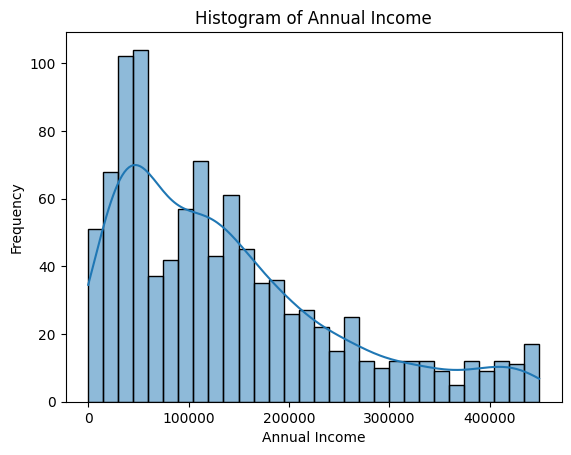

In [158]:
sns.histplot(df_Customers2['annual_income'], bins=30, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.show()

In [159]:
##### Data Cleaning and Preprocessing, Income should not be less than $100

In [160]:
df_Customers2.annual_income.describe()

count      1000.000000
mean     138916.765500
std      110969.408643
min           2.000000
25%       48229.500000
50%      113416.000000
75%      192614.000000
max      449346.000000
Name: annual_income, dtype: float64

In [161]:
##### Example Veer Mistry who is a businessman has an annual income of $50, Veer Mistry is a Business Owner and his annual income should not be less than $100 and should be replaced with 261191.5

In [162]:
income_by_occupation['Business Owner']

np.float64(261191.5)

In [163]:
df_Customers2[df_Customers2.name  == 'Veer Mistry']

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married


In [164]:
df_Customers2[df_Customers2.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [165]:
##### replacing the values less than 100 with the median of the annual income

In [166]:
def replace_low_income(df, income_by_occupation):
    df['annual_income'] = df.apply(
        lambda row: income_by_occupation[row['occupation']] if row['annual_income'] < 100 else row['annual_income'],
        axis=1
    )
    return df

df_Customers2 = replace_low_income(df_Customers2, income_by_occupation)
df_Customers2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [167]:
df_Customers2[df_Customers2.name  == 'Veer Mistry']

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married


In [168]:
df_Customers2[df_Customers2.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [169]:
###### Visualizing the distribution of annual income after cleaning

In [170]:
income_by_occupation_mean = df_Customers2.groupby('occupation')['annual_income'].mean()
income_by_occupation_mean

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [171]:
income_by_city_mean = df_Customers2.groupby('location')['annual_income'].mean()
income_by_city_mean

location
City      140682.526354
Rural     124832.905882
Suburb    145631.836207
Name: annual_income, dtype: float64

In [172]:
income_by_gender_mean = df_Customers2.groupby('gender')['annual_income'].mean()
income_by_gender_mean

gender
Female    130045.128834
Male      145532.398368
Name: annual_income, dtype: float64

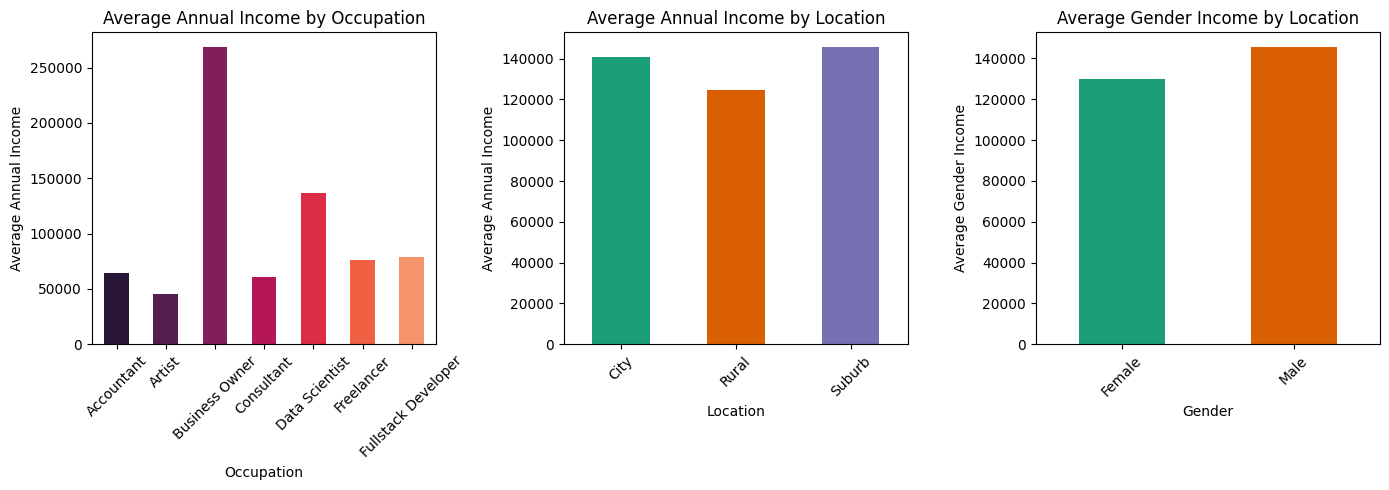

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

# Plotting the average annual income by occupation
income_by_occupation_mean.plot(kind='bar', color=sns.color_palette('rocket', 8), ax=axes[0], width=0.5)
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Average Annual Income')
axes[0].set_title('Average Annual Income by Occupation')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the average annual income by location
income_by_city_mean.plot(kind='bar', color=sns.color_palette('Dark2', 8), ax=axes[1], width=0.5)
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Average Annual Income')
axes[1].set_title('Average Annual Income by Location')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the average annual income by gender
income_by_gender_mean.plot(kind='bar', color=sns.color_palette('Dark2', 8), ax=axes[2], width=0.5)
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Average Gender Income')
axes[2].set_title('Average Gender Income by Location')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [174]:
###### Removing Outliars from Age column age should be between  15 and 80 years.

In [175]:
df_Customers2.age.describe()  

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [176]:
df_Customers2.age.median()    

np.float64(32.0)

In [177]:
# Calculate the median age
median_age = df_Customers2['age'].median()

# Replace age values less than 15 and greater than 80 with the median age
df_Customers2['age'] = df_Customers2['age'].apply(lambda x: median_age if x < 15 or x > 80 else x)

df_Customers2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,32.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [178]:
df_Customers2.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.506000,140483.548500
std,288.819436,12.192072,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.000000,195514.250000
max,1000.000000,64.000000,449346.000000


In [179]:
df_Credit.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000
